# Data Cleaning with Pandas (continued)

In [1]:
import pandas as pd

In [2]:
uci = pd.read_csv('data/heart.csv')

In [3]:
animal_outcomes = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')
animal_outcomes.columns = [x.lower().replace(' ', '_') for x in animal_outcomes.columns]

## 3. Methods for Re-Organizing DataFrames
#### `.groupby()`

Those of you familiar with SQL have probably used the GROUP BY command. Pandas has this, too.

The `.groupby()` method is especially useful for aggregate functions applied to the data grouped in particular ways.

In [4]:
sex = uci.groupby('sex')
sex.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1


#### `.groups` and `.get_group()`

In [5]:
uci.groupby('sex').groups

{0: Int64Index([  2,   4,   6,  11,  14,  15,  16,  17,  19,  25,  28,  30,  35,
              36,  38,  39,  40,  43,  48,  49,  50,  53,  54,  59,  60,  65,
              67,  69,  74,  75,  82,  84,  85,  88,  89,  93,  94,  96, 102,
             105, 107, 108, 109, 110, 112, 115, 118, 119, 120, 122, 123, 124,
             125, 127, 128, 129, 130, 131, 134, 135, 136, 140, 142, 143, 144,
             146, 147, 151, 153, 154, 155, 161, 167, 181, 182, 190, 204, 207,
             213, 215, 216, 220, 223, 241, 246, 252, 258, 260, 263, 266, 278,
             289, 292, 296, 298, 302],
            dtype='int64'),
 1: Int64Index([  0,   1,   3,   5,   7,   8,   9,  10,  12,  13,
             ...
             288, 290, 291, 293, 294, 295, 297, 299, 300, 301],
            dtype='int64', length=207)}

In [6]:
uci.groupby('sex').get_group(0) # .tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
11,48,0,2,130,275,0,1,139,0,0.2,2,0,2,1
14,58,0,3,150,283,1,0,162,0,1.0,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0


### Aggregating

In [7]:
uci.groupby('sex').std()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,9.409396,0.972427,19.311119,65.088946,0.332455,0.557150,20.047969,0.422503,1.119844,0.593736,0.881026,0.441290,0.435286
1,8.883803,1.059064,16.658246,42.782392,0.366955,0.510754,24.130882,0.484505,1.174632,0.627378,1.074082,0.659949,0.498626


Exercise: Tell me the average cholesterol level for those with heart disease.

In [8]:
# Your code here!
uci.groupby('target').mean().chol

target
0    251.086957
1    242.230303
Name: chol, dtype: float64

### Apply to Animal Shelter Data

#### Task 1
- Use a groupby to show the average age of the different kinds of animal types.
- What about by animal types **and** gender?
 

In [9]:
animal_outcomes.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A789027,Lennie,02/17/2019 11:44:00 AM,02/17/2019 11:44:00 AM,02/13/2017,Adoption,NaN,Dog,Neutered Male,2 years,Chihuahua Shorthair Mix,Cream
1,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
2,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
3,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
4,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby


In [10]:
animal_outcomes['age_cal'] = pd.to_datetime(animal_outcomes['datetime']) - pd.to_datetime(animal_outcomes['date_of_birth'])

In [11]:
animal_outcomes['age_cal'].mean()

Timedelta('804 days 03:36:43.734127')

#### Task 2:
- Create new columns `year` and `month` by using a lambda function x.year on date
- Use `groupby` and `.size()` to tell me how many animals are adopted by month

In [12]:
animal_outcomes['datetime'] = pd.to_datetime(animal_outcomes['datetime'])

In [13]:
# Your code here
animal_outcomes['year'] = animal_outcomes['datetime'].dt.year
animal_outcomes['month'] = animal_outcomes['datetime'].dt.month

In [14]:
animal_outcomes.groupby(['outcome_type','month']).size()

outcome_type  month
Adoption      1        3696
              2        3169
              3        3191
              4        2805
              5        3787
                       ... 
Transfer      8        3216
              9        3275
              10       3580
              11       2712
              12       1979
Length: 106, dtype: int64


## Reshaping a DataFrame

### `.pivot()` and `.pivot_table()`

Those of you familiar with Excel have probably used Pivot Tables. Pandas has a similar functionality.

In [15]:
uci.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [17]:
uci.pivot(values='sex', columns='target').head()

target,0,1
0,NaN,1.0
1,NaN,1.0
2,NaN,0.0
3,NaN,1.0
4,NaN,0.0


In [18]:
uci.pivot_table(values='chol', index='sex', columns='target', aggfunc='mean')

target,0,1
sex,,
0,274.958333,256.750000
1,246.061404,230.989247


### Methods for Combining DataFrames: `.join()`, `.merge()`, `.concat()`, `.melt()`

### `.join()`

In [19]:
toy1 = pd.DataFrame([[63, 142], [33, 47]], columns = ['age', 'HP'])
toy2 = pd.DataFrame([[63, 100], [33, 200]], columns = ['age', 'HP'])

In [20]:
toy1

,age,HP
0,63,142
1,33,47


In [21]:
toy2

,age,HP
0,63,100
1,33,200


In [27]:
toy1.join(toy2.set_index('age'),
          on='age',
          lsuffix='_1',
          rsuffix='_2').head()


,age_1,HP_1,age_2,HP_2
0,63,142,NaN,NaN
1,33,47,NaN,NaN


### `.merge()`

In [28]:
ds_chars = pd.read_csv('data/ds_chars.csv', index_col=0)
ds_chars

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [29]:
states = pd.read_csv('data/states.csv', index_col=0)
states

,state,nickname,capital
0,WA,evergreen,Olympia
1,TX,alamo,Austin
2,DC,district,Washington
3,OH,buckeye,Columbus
4,OR,beaver,Salem


In [31]:
ds_chars.merge(states,
               left_on='home_state',
               right_on='state',
               how='inner')

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,WA,evergreen,Olympia
2,alan,170,TX,TX,alamo,Austin
3,rachel,200,TX,TX,alamo,Austin
4,alison,300,DC,DC,district,Washington


### `pd.concat()`

Exercise: Look up the documentation on pd.concat (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html) and use it to concatenate ds_chars and states.
<br/>
Your result should still have only five rows!

In [32]:
pd.concat([ds_chars, states], axis=1)

,name,HP,home_state,state,nickname,capital
0,greg,200,WA,WA,evergreen,Olympia
1,miles,200,WA,TX,alamo,Austin
2,alan,170,TX,DC,district,Washington
3,alison,300,DC,OH,buckeye,Columbus
4,rachel,200,TX,OR,beaver,Salem


### `pd.melt()`

Melting removes the structure from your DataFrame and puts the data in a 'variable' and 'value' format.

In [33]:
ds_chars.head()

,name,HP,home_state
0,greg,200,WA
1,miles,200,WA
2,alan,170,TX
3,alison,300,DC
4,rachel,200,TX


In [38]:
states_melt = pd.melt(ds_chars,
        id_vars=['name'],
        value_vars=['HP', 'home_state'])
states_melt

,name,variable,value
0,greg,HP,200
1,miles,HP,200
2,alan,HP,170
3,alison,HP,300
4,rachel,HP,200
5,greg,home_state,WA
6,miles,home_state,WA
7,alan,home_state,TX
8,alison,home_state,DC
9,rachel,home_state,TX


KeyError: "None of [Index(['HP', 'home_state'], dtype='object')] are in the [columns]"

## Bringing it all together with the Animal Shelter Data

Join the data from the [Austin Animal Shelter Intake dataset](https://data.austintexas.gov/Health-and-Community-Services/Austin-Animal-Center-Intakes/wter-evkm) to the outcomes dataset by Animal ID.

Use the dates from each dataset to see how long animals spend in the shelter. Does it differ by time of year? By outcome?

The Url for the Intake Dataset is here: https://data.austintexas.gov/api/views/wter-evkm/rows.csv?accessType=DOWNLOAD

_Hints_ :
- import and clean the intake dataset first
- use apply/applymap/lambda to change the variables to their proper format in the intake data
- rename the columns in the intake dataset *before* joining
- create a new days-in-shelter variable
- Notice that some values in "days_in_shelter" column are NaN or values < 0 (remove these rows using the "<" operator and ~is.na())
- Use group_by to get some interesting information about the dataset

Make sure to export and save your cleaned dataset. We will use it in a later lecture!

use the notation `df.to_csv()` to write the `df` to a csv. Read more about the `to_csv()` documentation [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html)

In [ ]:
#code here

![matplotlib](https://matplotlib.org/_static/logo2.png)
# Data Visualization with Matplotlib


### Why is visualization important?


There are a lot of visualizations out there these days.

Ultimately they are about quickly revealing relationships and anomolies.

While we will review what makes a **GOOD** visualization later, we will cover a few basic types today.

Let's look at some [examples from python graphs](https://python-graph-gallery.com/)


In [40]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline


![msatplot](https://python-graph-gallery.com/wp-content/uploads/Logo_PGG_full-3.jpg)

The [Python Graph Gallery](https://python-graph-gallery.com/matplotlib/) has some great resources to guide you through the code needed to create each type of matplotlib plot. 

### Plot Anatomy
Let's spend some time on the terminology of a plot. There are a lot of options to set in matplotlib plots, so let's identify some common terminology. 

The sequence of events with matplotlib are:

| Step | Code Example |
| :---- | :------------ |
| 1. Create figure | `fig = plt.figure(figsize=(2, 4))` |
| 2. Create axis object | `ax = plt.subplot()` |
| 3. Make adjustments | `plt.title`, `ax.set_xticks`, etc |
| 4. Show final plot | `plt.show()` . |


The [Pyplot tutorial](https://matplotlib.org/tutorials/introductory/pyplot.html) shows a list of options you can set within a plot.

<img src="https://matplotlib.org/_images/sphx_glr_anatomy_001.png" width=550>


Let's look [how they created this plot.](https://matplotlib.org/gallery/showcase/anatomy.html)

### 1 Barplots
Barplots are used for displaying __one dimensional__, __discrete__ data. You call plt.bar with two arguments:
- the x — a list of x-positions for each bar
- the y-values — a list of heights for each bar

In [43]:
list(range(5))

[0, 1, 2, 3, 4]

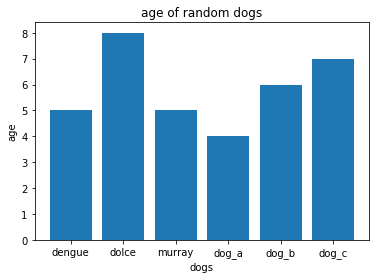

In [47]:
# an example of a bar plot
ax = plt.subplot()
our_dogs = ["dengue", "dolce", "murray", "dog_a", "dog_b", "dog_c"]
dogs_age = [5, 8, 5, 4, 6, 7]

plt.bar(range(len(our_dogs)), dogs_age)

# set ticks values, as a method of the axes
ax.set_xticks(range(0, len(our_dogs)))
ax.set_xticklabels(our_dogs)

plt.title('age of random dogs')
plt.xlabel('dogs')
plt.ylabel('age')
plt.show()

[What is ax and figure?](https://stackoverflow.com/questions/34162443/why-do-many-examples-use-fig-ax-plt-subplots-in-matplotlib-pyplot-python)

Text(0.5, 1.0, 'cat age')

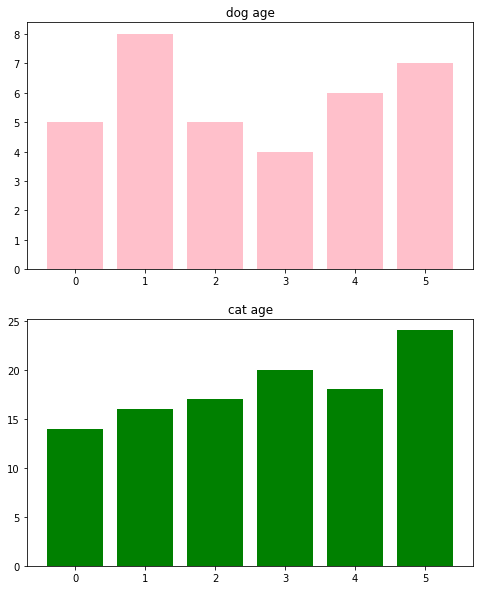

In [48]:
# utilizing the subplot function and creating subplots
our_cats = ["cat_1", "cat_2", "cat_3", "cat_4", "cat_5", "cat_6"]
cats_age = [14, 16, 17, 20, 18, 24]
fig = plt.figure(figsize=(8, 10))
plt.subplot(2, 1, 1)
plt.bar(range(len(our_dogs)), dogs_age, color='pink')
plt.title('dog age')
plt.subplot(2, 1, 2)
plt.bar(range(len(our_cats)), cats_age, color='green')
plt.title('cat age')

What is something that you notice here that needs to be fixed?

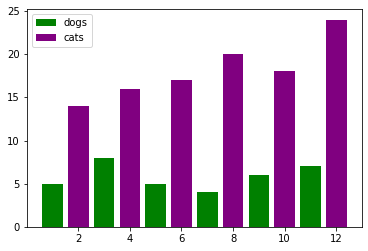

In [50]:
# we can create overlaid or side-by-side bargraph. You need
# to shift the x value by width to accommodate for two graphs.

fig = plt.figure()
n = 1  # This is our first dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 1  # Width of each bar

# essentially, this list comprehension gives us the position
dog_values = [t*element + w*n for element in range(d)]

# of the position of dogs
plt.bar(dog_values, dogs_age, color='green')


n = 2  # This is our second dataset (out of 2)
t = 2  # Number of datasets
d = 6  # Number of sets of bars
w = 1  # Width of each bar

cat_values = [t*element + w*n for element in range(d)]

plt.bar(cat_values, cats_age, color='purple')
plt.legend(["dogs", "cats"])

In [51]:
print(dog_values)
print(cat_values)

[1, 3, 5, 7, 9, 11]
[2, 4, 6, 8, 10, 12]


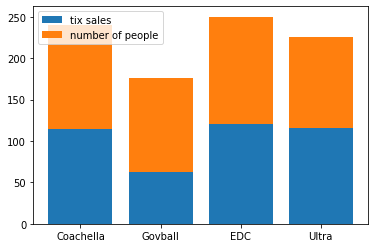

In [52]:
# stacked barplots
ax = plt.subplot()
music_festivals = ["Coachella", "Govball", "EDC", "Ultra"]
ticket_sales_in_millon = [114, 62, 120, 116]
people_attended_in_thousands = [126, 114, 130, 110]

plt.bar(range(len(music_festivals)),
        ticket_sales_in_millon)
plt.bar(range(len(music_festivals)),
        people_attended_in_thousands,
        bottom=ticket_sales_in_millon)

plt.legend(["tix sales", "number of people"])
ax.set_xticks(range(0, len(music_festivals)))
ax.set_xticklabels(music_festivals)
plt.show()

### Bar plot - animal shelter dataset

Let's make a bar plot comparing dogs and cats by month when they are admitted to the shelter.

In [53]:
animal_shelter_df = pd.read_csv('https://data.austintexas.gov/api/views/9t4d-g238/rows.csv?accessType=DOWNLOAD')

In [54]:
animal_shelter_df.columns = [x.lower().replace(' ','_') for x in animal_shelter_df.columns]

In [55]:
animal_shelter_df.head()

,animal_id,name,datetime,monthyear,date_of_birth,outcome_type,outcome_subtype,animal_type,sex_upon_outcome,age_upon_outcome,breed,color
0,A720371,Moose,02/13/2016 05:59:00 PM,02/13/2016 05:59:00 PM,10/08/2015,Adoption,NaN,Dog,Neutered Male,4 months,Anatol Shepherd/Labrador Retriever,Buff
1,A674754,NaN,03/18/2014 11:47:00 AM,03/18/2014 11:47:00 AM,03/12/2014,Transfer,Partner,Cat,Intact Male,6 days,Domestic Shorthair Mix,Orange Tabby
2,A689724,*Donatello,10/18/2014 06:52:00 PM,10/18/2014 06:52:00 PM,08/01/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,Black
3,A680969,*Zeus,08/05/2014 04:59:00 PM,08/05/2014 04:59:00 PM,06/03/2014,Adoption,NaN,Cat,Neutered Male,2 months,Domestic Shorthair Mix,White/Orange Tabby
4,A684617,NaN,07/27/2014 09:00:00 AM,07/27/2014 09:00:00 AM,07/26/2012,Transfer,SCRP,Cat,Intact Female,2 years,Domestic Shorthair Mix,Black


### 2 Histogram
Histograms are like barplots in the sense that it describe __one-dimensional__ data. A histogram divides the variable into bins, counts the number of observations in each bin, and shows the bins on the x-axis and the frequency on the y-axis. It is used for visualizing __continuous__ variables. <br>

From the documentation: compute and draw the histogram of x. The return value is a tuple (__n, bins, patches__) or ([n0, n1, ...], bins, [patches0, patches1,...]) if the input contains multiple data.

Comparison of barplots and histogram
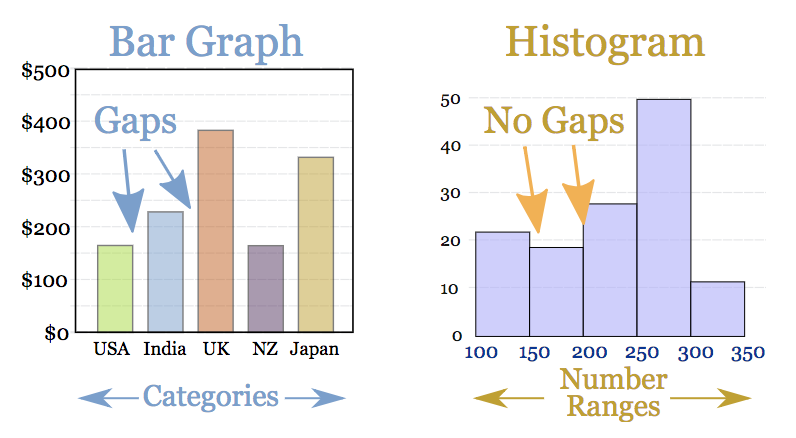

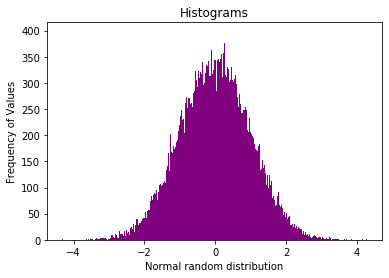

In [56]:
# Set seed for reproducability
np.random.seed(2018)

# Generate 1000 values from 0 standard normal distribution
x = np.random.randn(100000)

# Plot the distogram with hist() function
plt.hist(x, bins=1000, color='purple')

plt.xlabel('Normal random distribution')
plt.ylabel('Frequency of Values')
plt.title('Histograms')
plt.show()

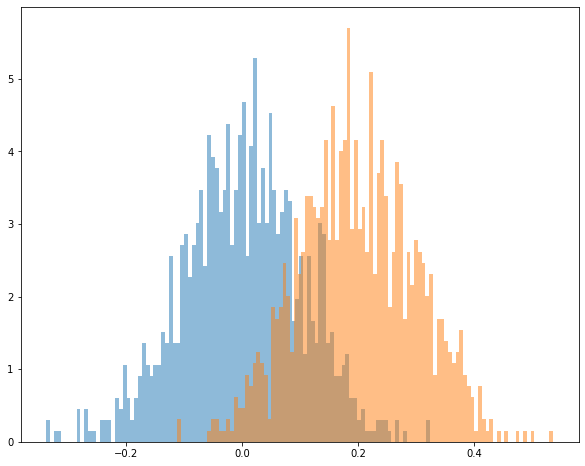

In [58]:
# overlaid histograms for two distributions
# plotting two histograms
mu1, sigma1 = 0, 0.1  # mean and standard deviation
s1 = np.random.normal(mu1, sigma1, 1000)
mu2, sigma2 = 0.2, 0.1
s2 = np.random.normal(mu2, sigma2, 1000)
plt.figure(figsize=(10, 8))
plt.hist(s1, bins=100, density=True, alpha=.5)
plt.hist(s2, bins=100, density=True, alpha=.5)
plt.show()

### 3. Scatterplot - visualizing two dimensional data
Scatterplots are usually used for visualizing two dimensional data (observations with two variables). It allows us to examine the relationship between two variables, thus it is sometimes called a correlation plot. 

In [ ]:
# generate some data -> the sine wave
x = np.linspace(0, 10, 30)
y = np.sin(x)
plt.scatter(x, y, label="Function: sin(x)")
plt.title('Scatter Plot in Matplotlib')
plt.legend()
plt.show()

In [ ]:
# examining correlation with height and weight
height = [63, 62, 60, 63, 64, 65, 68, 67, 64, 71, 72, 70, 73]
weight = [120, 115, 114, 119, 125, 130, 135, 140, 128, 140, 150, 165, 180]
plt.scatter(height, weight, color='r')
plt.show()

### 4 - Pie Charts

In [ ]:
# pie chart
music_genre = ['R&B', 'Rock', 'Country', 'House', 'Hip Pop', 'Techno']
num_people_like = [15, 5, 3, 7, 18, 3]

# Make your plot here
plt.figure(figsize=(10, 8))
plt.pie(num_people_like, labels=music_genre, autopct="%1d%%")

plt.axis('equal')
plt.title('Music Preference')

plt.show()